In [1]:
import time
import datetime
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from utlis_v3_newdashboard import *

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from calendar import monthrange
import os
from IPython.core.display import Image, display

# 1. Set up the FireFox setting

<font color='red'>DO NOT RUN ANY CODE IN SECTION 1, JUST FOLLOW THEM TO SET UP YOUR FIRE FOX</font>


# 1.1 Download the Firefox webdriver

You can download it from https://github.com/mozilla/geckodriver/releases

You will need to set the "executable_path" as the path to the webdriver you just download.  (you will need to do it in section 2)

# 1.2 Set up your FireFox preferences


First, open the Firefox, login with your Firefox account and password

Second, click the "preference"  button

(See the picture below)


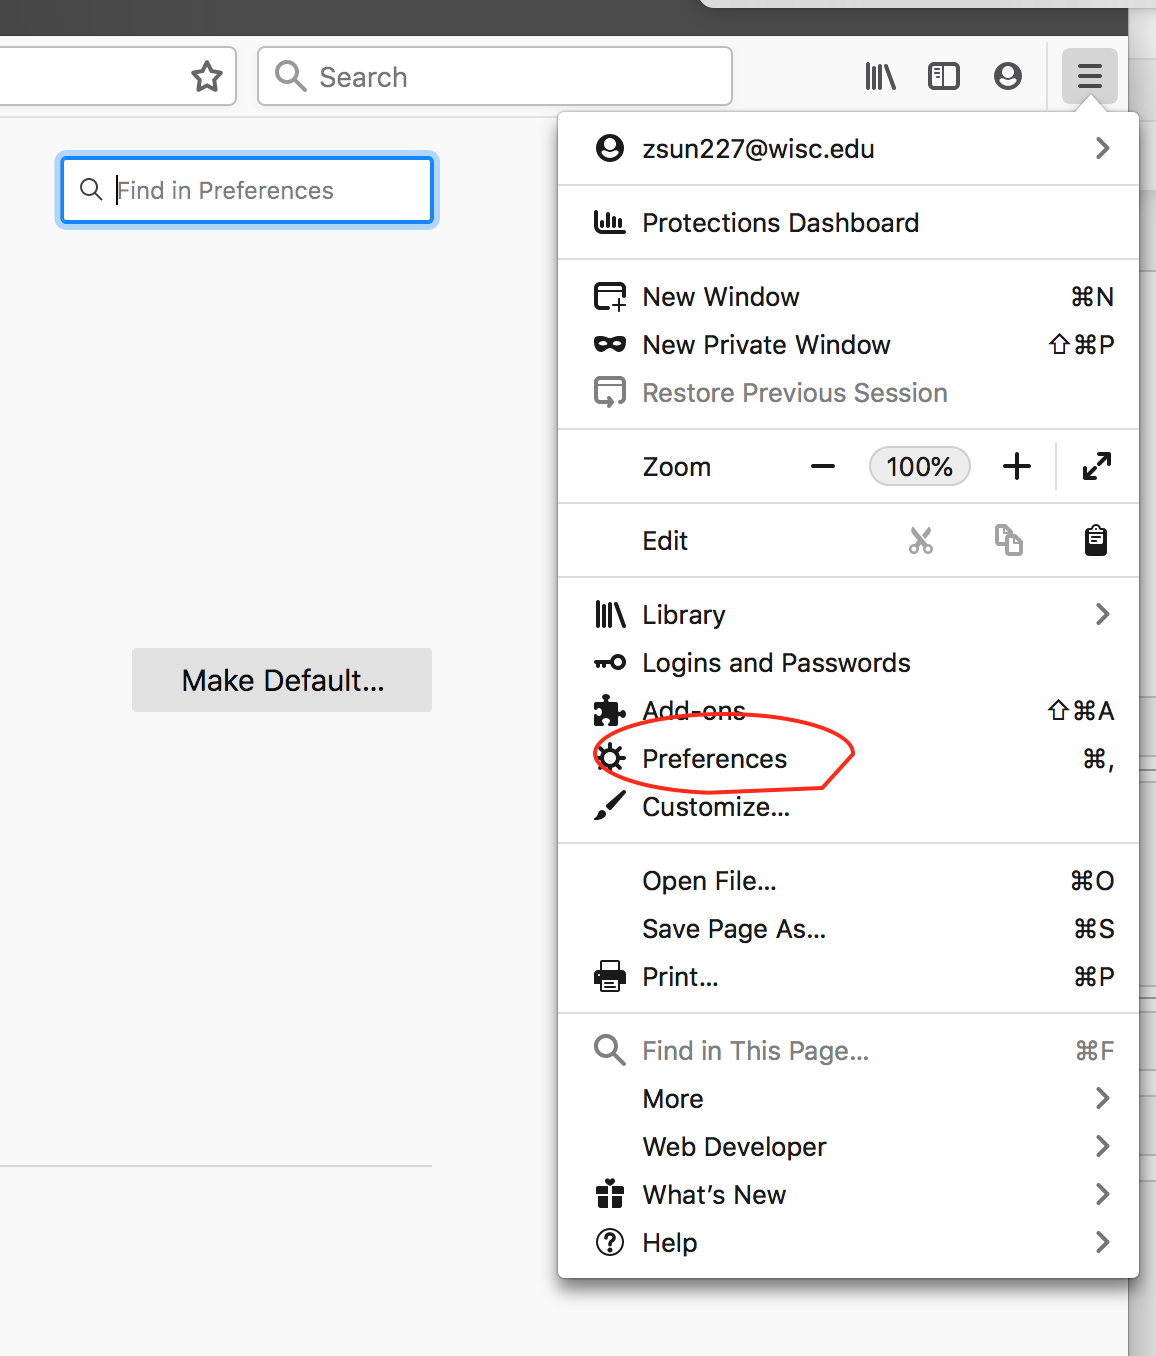

In [2]:
# You don't need to run this code
display(Image('/Users/sunzhongkai/Desktop/firefox1.png', width = 500))

Then, go to the "Files and Applications" and setup the "save files to" 

You will also need to change your "store_folder_path" to the same path you set up here 

(you will need to do it in section 2)

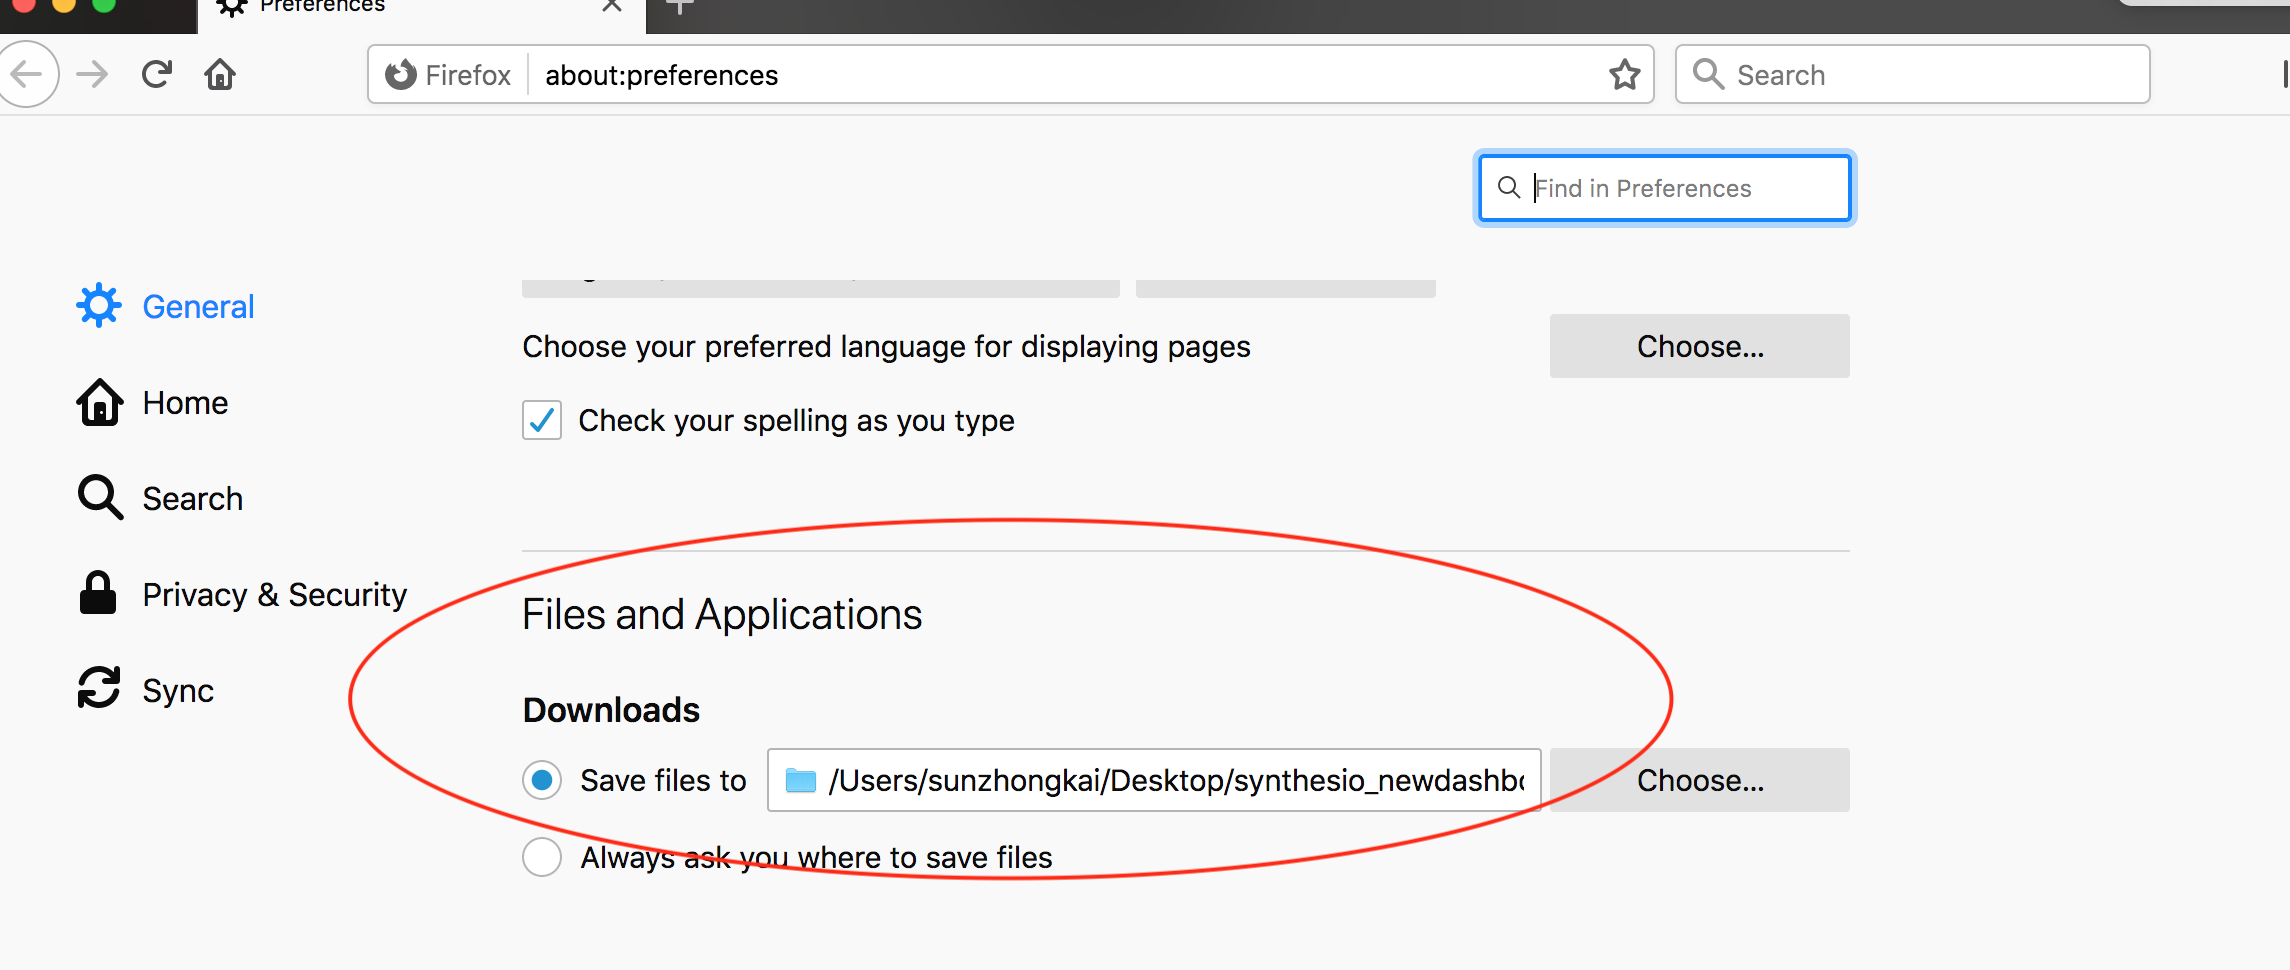

In [3]:
display(Image('/Users/sunzhongkai/Desktop/firefox2.png', width = 800))

The last step, type in "about:support" as the url, go to this page and find out your "Profile Folder path"

You will also need to change your "firefox_profile" to this "Profile Folder path"

(you will need to do it in section 2)

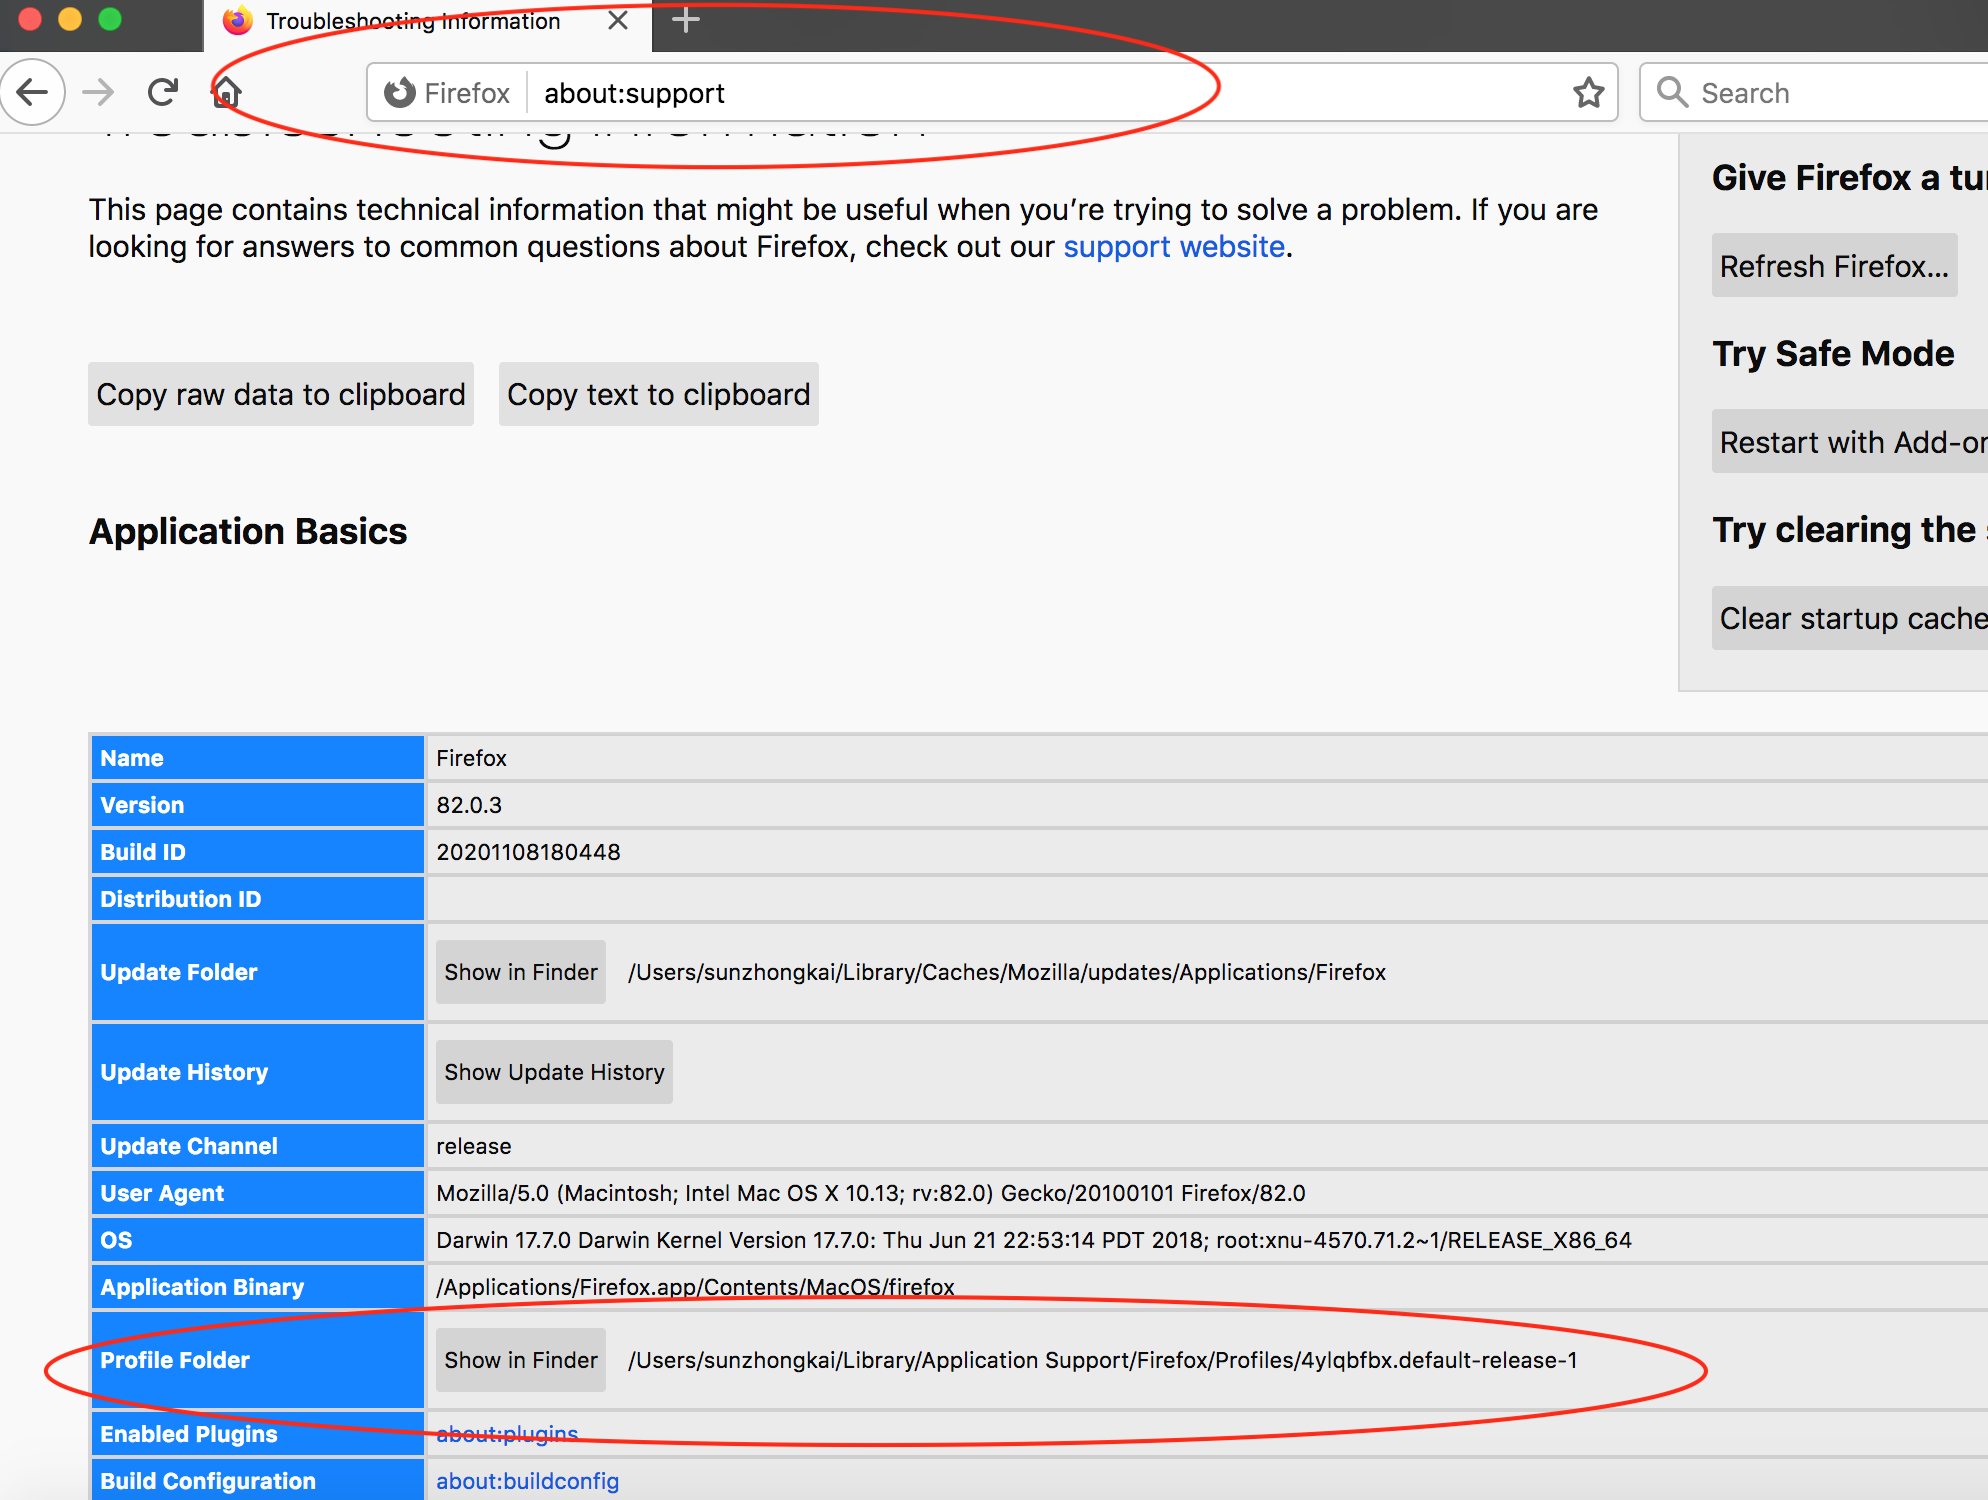

In [4]:
display(Image('/Users/sunzhongkai/Desktop/firefox3.png', width = 800))

<font color='red'>Now you have finished the Firefox setting, and you should have three paths: </font>

1. executable_path
2. store_folder_path
3. firefox_profile

# 2. Set up necessary parameters


First, set up the three paths obtained from section 1

In [14]:
executable_path = '/Users/sunzhongkai/Downloads/geckodriver'
store_folder_path = '/Users/sunzhongkai/Desktop/synthesio_newdashboard/synthesio_download'
firefox_profile = '/Users/sunzhongkai/Library/Application Support/Firefox/Profiles/4ylqbfbx.default-release-1'

Second, set up Synthesio related parameters

In [6]:

account = 'zsun227@wisc.edu'
password = 'Synthesio022912'
dashboard_name = 'MeToo'
language_list = [ 'English', 'French', 'Korean']
start_date = '2018/04/30'
end_date = '2018/05/03'
interval_hour_len = 12 # check data for every 6 hours, you need to choose a number which is divisible by 24. Such as 2, 4, 6, 8, 12 

Then, just run the following code 

In [7]:

previous_folder_size = len(os.listdir(store_folder_path))
max_recur = 10
start_year, start_month, start_day = start_date.split('/')[0], start_date.split('/')[1], start_date.split('/')[2]
end_year, end_month, end_day = end_date.split('/')[0], end_date.split('/')[1], end_date.split('/')[2]
date_interval = (datetime(int(end_year), int(end_month), int(end_day)) - 
                 datetime(int(start_year), int(start_month), int(start_day))).days

In [8]:
# Open a new driver 
driver = setup(language_list,
              account,
              password,
              executable_path,
              firefox_profile,
              dashboard_name)

We currently have  4  Dashboards:  ['Market Research', 'MeToo', 'CAMER', 'Immigration']
The location of the dashboard we are seeking for is: Index[ 1 ].


In [9]:
# The main download session
cur_year, cur_month, cur_day, cur_hour  = start_year, start_month, start_day, 0
index = 0
date_interval = (datetime(int(end_year), int(end_month), int(end_day)) - 
                 datetime(int(start_year), int(start_month), int(start_day))).days + 1

volume_record = {}
volume_record['date'] = []
volume_record['volume'] = []
volume_csv = pd.DataFrame(volume_record)
volume_csv.to_csv('volume_record.csv')
while index < date_interval:
    
    if (cur_hour + interval_hour_len) <= 24:
        clear(driver)
        time.sleep(4)
        try:
            cur_volume = run_interval(store_folder_path, 
                                      driver, cur_year, cur_month, 
                                      cur_day, str(cur_hour), 
                                      interval_hour_len, language_list)
            time.sleep(4)
#             print (cur_year, cur_month, cur_day, cur_hour)
#             print (cur_volume)
            cur_date = cur_year + '-' + cur_month + '-' + cur_day + '-' + str(cur_hour) + '-' + str(cur_hour + interval_hour_len)
            tmp_csv = pd.read_csv('volume_record.csv')[['date', 'volume']]
            tmp_csv2 = tmp_csv.append(pd.DataFrame({'date': [cur_date], 'volume': [str(cur_volume)]}))
            tmp_csv2.to_csv('volume_record.csv')
            cur_hour = cur_hour + interval_hour_len
            max_recur = 10
        except Exception as e:
            print(e)
            print ('error occurs, try to reload the work ' + str(max_recur) + ' more times')
            
            driver.close()
            time.sleep(10)
            driver = setup(language_list,
                  account,
                  password,
                  executable_path,
                  firefox_profile,
                  dashboard_name)

    else:
        index += 1
        cur_hour = 0
    
        if int(cur_day) < monthrange(int(cur_year), int(cur_month))[1]:
            cur_day = str(int(cur_day) + 1)
            if int(cur_day) < 10:
                cur_day = '0' + str(int(cur_day))

        else:
            cur_day = '01'
            if cur_month != '12':
                cur_month = str(int(cur_month) + 1)
                if int(cur_month) < 10:
                    cur_month = '0' + str(int(cur_month))

            else:
                cur_month = '01'
                cur_year = str(int(cur_year) + 1)

print ('All download finished')     

    

Date: 2018/04/30 Hour: 00:00-12:00   The total Volume is 46.4K Data is ready to download.
Download ready
Date: 2018/04/30 Hour: 12:00-23:59    The total Volume 51.2K is larger than the cap!
Download ready
Date: 2018/05/01 Hour: 00:00-12:00    The total Volume 56.6K is larger than the cap!
Download ready
Date: 2018/05/01 Hour: 12:00-23:59    The total Volume 69.0K is larger than the cap!
Download ready
Date: 2018/05/02 Hour: 00:00-12:00    The total Volume 70.6K is larger than the cap!
Download ready
Date: 2018/05/02 Hour: 12:00-23:59    The total Volume 66.9K is larger than the cap!
Download ready
Date: 2018/05/03 Hour: 00:00-12:00    The total Volume 65.1K is larger than the cap!
Download ready
Date: 2018/05/03 Hour: 12:00-23:59    The total Volume 62.0K is larger than the cap!
Download ready
All download finished


<font color='red'>Notice: Firefox may ask you how to deal with the ".xlsx" file at the first time </font>

<font color='red'>You should choose "save file" and also choose "do this automatically..."  </font>

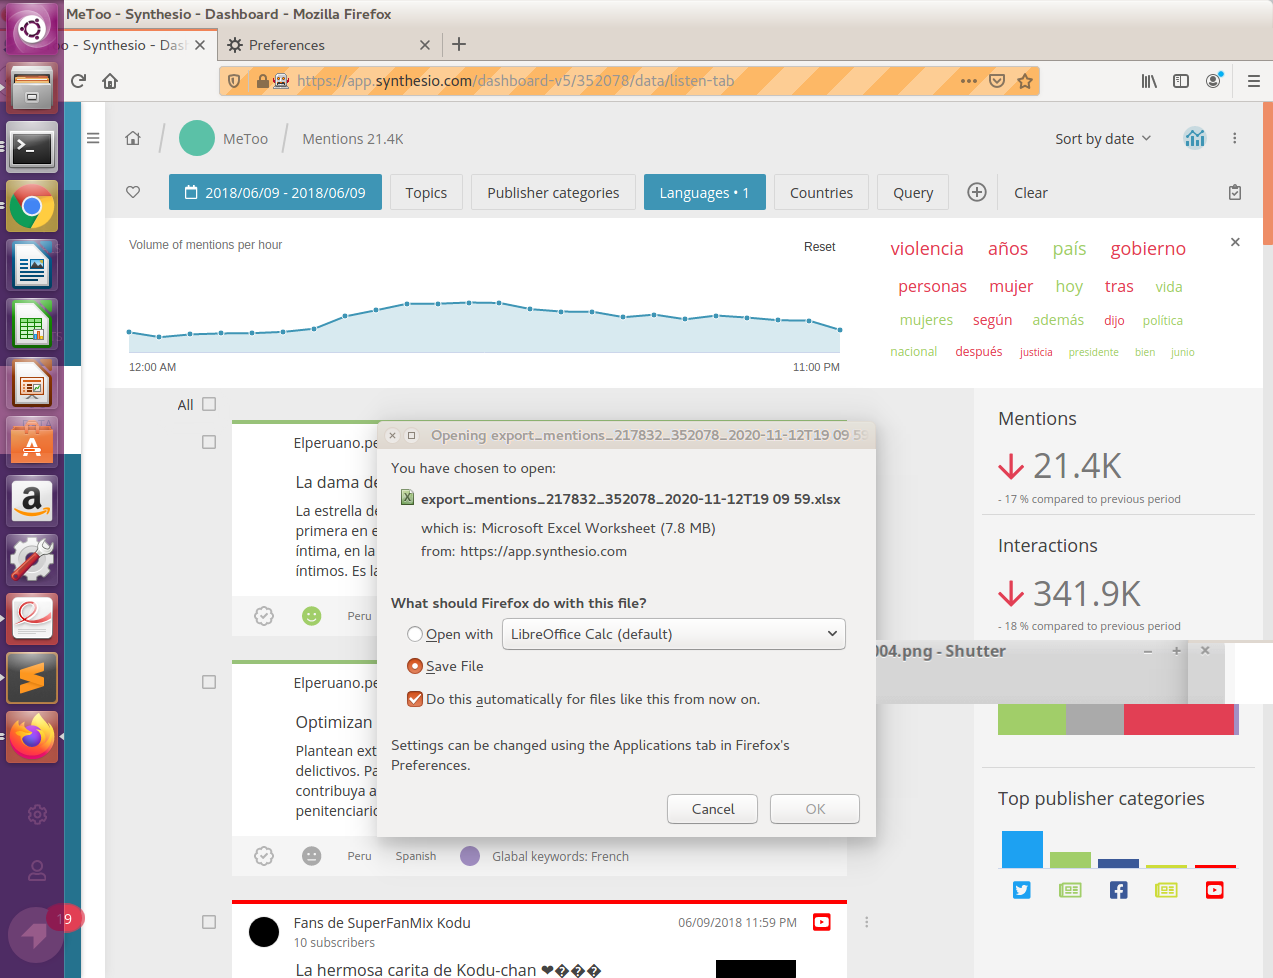

In [13]:
display(Image('/Users/sunzhongkai/Desktop/firefox4.png', width = 800))